<a href="https://colab.research.google.com/github/shubhxmyadav/DSA/blob/main/Mrkt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Market Trend Analysis using IBEX 35 Dataset

**Student Name:** Shubham Yadav
**Module:** AI Applications  
**Project Type:** Individual Project  

This project applies machine learning techniques to analyze historical stock market data from the IBEX 35 index and predict market trends.


# 1. Problem Definition & Objective

## a. Selected Project Track
**Track:** AI for Market Trend Analysis  
**Domain:** Financial Analytics  
**AI Technique:** Machine Learning (Regression)

---

## b. Clear Problem Statement
Financial markets generate massive volumes of time-series data daily. Manual analysis of stock prices to identify meaningful trends is inefficient and prone to human bias.  

The objective of this project is to develop an AI-based machine learning model that learns patterns from historical IBEX 35 stock index data and predicts closing prices to assist in market trend analysis.

---

## c. Real-World Relevance and Motivation
Market trend prediction helps investors, analysts, and financial institutions make informed decisions, manage risk, and optimize investments.  

AI systems can process large datasets efficiently, detect hidden patterns, and provide consistent predictive insights. This project demonstrates the application of machine learning for financial market analysis using real-world data.


# 2. Data Understanding & Preparation

## a. Dataset Source
**Dataset:** IBEX 35 Historical Data (1994–2020)  
**Source:** Kaggle  
**Link:** https://www.kaggle.com/datasets/iolalla/ibex3519942020  
**Type:** Public Dataset  

The dataset contains daily stock index data including Date, Open, High, Low, Close, Adjusted Close, and Volume.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data = pd.read_csv("IBEX-2022.csv")

# Preview dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,8729.700195,8808.099609,8725.000000,8761.200195,8761.200195,117500900
1,2022-01-04,8821.599609,8834.099609,8784.700195,8795.799805,8795.799805,192378100
2,2022-01-05,8799.599609,8821.599609,8768.099609,8790.799805,8790.799805,146051700
3,2022-01-06,8664.599609,8789.900391,8628.900391,8789.900391,8789.900391,174962400
4,2022-01-07,8781.900391,8796.500000,8709.500000,8751.799805,8751.799805,170218700


In [ ]:
# Rows and columns
data.shape


(255, 7)

In [ ]:
# Column info and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       255 non-null    object 
 1   Open       255 non-null    float64
 2   High       255 non-null    float64
 3   Low        255 non-null    float64
 4   Close      255 non-null    float64
 5   Adj Close  255 non-null    float64
 6   Volume     255 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.1+ KB


In [ ]:
# Summary statistics
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,8259.726250,8322.796867,8193.321188,8258.745477,8258.745477,1.890627e+08
std,374.051172,365.945311,377.442112,369.958819,369.958819,7.045969e+07
min,7234.100098,7359.700195,7189.600098,7261.100098,7261.100098,8.227710e+07
25%,8034.750000,8119.850098,7979.399902,8053.600098,8053.600098,1.445936e+08
50%,8275.700195,8338.099609,8205.500000,8272.500000,8272.500000,1.734248e+08
75%,8533.350098,8619.399903,8448.649903,8512.050293,8512.050293,2.114678e+08
max,8975.599609,8992.700195,8905.599609,8933.599609,8933.599609,5.261247e+08


## b. Data Loading and Exploration  
The dataset is explored using shape, data types, and statistical summaries to understand its structure.

## c. Cleaning, Preprocessing & Feature Engineering
- Convert date column to datetime format.
- Sort records chronologically.
- Create new features:
  - Daily Price Change
  - High-Low Range (Volatility Indicator)


In [ ]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort by date
data = data.sort_values('Date')

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,8729.700195,8808.099609,8725.000000,8761.200195,8761.200195,117500900
1,2022-01-04,8821.599609,8834.099609,8784.700195,8795.799805,8795.799805,192378100
2,2022-01-05,8799.599609,8821.599609,8768.099609,8790.799805,8790.799805,146051700
3,2022-01-06,8664.599609,8789.900391,8628.900391,8789.900391,8789.900391,174962400
4,2022-01-07,8781.900391,8796.500000,8709.500000,8751.799805,8751.799805,170218700


In [ ]:
# Feature Engineering
data['Price_Change'] = data['Close'] - data['Open']
data['High_Low_Range'] = data['High'] - data['Low']

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,High_Low_Range
0,2022-01-03,8729.700195,8808.099609,8725.000000,8761.200195,8761.200195,117500900,31.500000,83.099609
1,2022-01-04,8821.599609,8834.099609,8784.700195,8795.799805,8795.799805,192378100,-25.799804,49.399414
2,2022-01-05,8799.599609,8821.599609,8768.099609,8790.799805,8790.799805,146051700,-8.799804,53.500000
3,2022-01-06,8664.599609,8789.900391,8628.900391,8789.900391,8789.900391,174962400,125.300782,161.000000
4,2022-01-07,8781.900391,8796.500000,8709.500000,8751.799805,8751.799805,170218700,-30.100586,87.000000


## d. Handling Missing Values and Noise
Missing values can negatively impact model accuracy. Forward fill technique is used to handle missing data where applicable.


In [ ]:
# Check missing values
data.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Price_Change,0
High_Low_Range,0


In [ ]:
# Forward fill missing values if any
data.fillna(method='ffill', inplace=True)

# Verify again
data.isnull().sum()


/tmp/ipython-input-874755354.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Price_Change,0
High_Low_Range,0


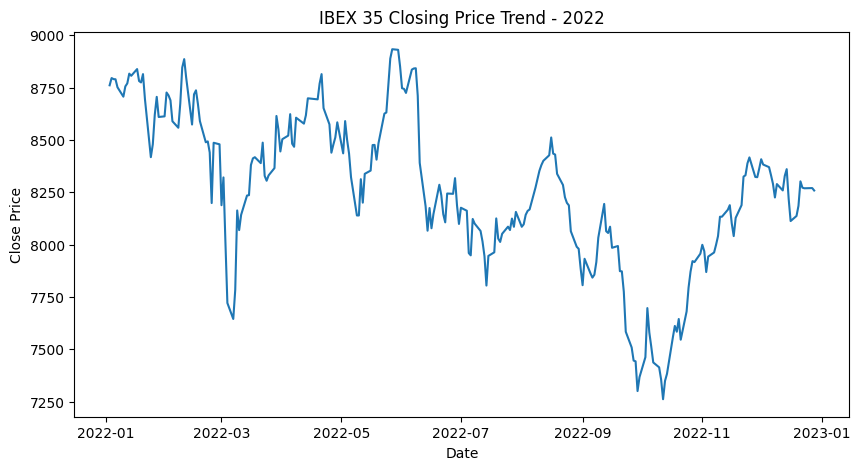

In [ ]:
# Plot closing price trend
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'])
plt.title("IBEX 35 Closing Price Trend - 2022")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


# 3. Model / System Design

## a. AI Technique Used
Machine Learning (Supervised Regression)

## b. Architecture / Pipeline
Data → Preprocessing → Feature Engineering → Train-Test Split → Scaling → Model Training → Prediction → Evaluation

## c. Justification
Regression models are interpretable, efficient, and suitable for numerical prediction problems with structured datasets.


In [ ]:
# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'High_Low_Range']
X = data[features]
y = data['Close']

X.head(), y.head()


(          Open         High          Low     Volume  Price_Change  \
 0  8729.700195  8808.099609  8725.000000  117500900     31.500000   
 1  8821.599609  8834.099609  8784.700195  192378100    -25.799804   
 2  8799.599609  8821.599609  8768.099609  146051700     -8.799804   
 3  8664.599609  8789.900391  8628.900391  174962400    125.300782   
 4  8781.900391  8796.500000  8709.500000  170218700    -30.100586   
 
    High_Low_Range  
 0       83.099609  
 1       49.399414  
 2       53.500000  
 3      161.000000  
 4       87.000000  ,
 0    8761.200195
 1    8795.799805
 2    8790.799805
 3    8789.900391
 4    8751.799805
 Name: Close, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((204, 6), (51, 6))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
# Predict
y_pred = model.predict(X_test_scaled)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})

comparison


,Actual,Predicted
0,7442.200195,7442.200195
1,8755.900391,8755.900391
2,8439.299805,8439.299805
3,7583.600098,7583.600098
4,8145.899902,8145.899902
5,7872.200195,7872.200195
6,7348.799805,7348.799805
7,8063.899902,8063.899902
8,8806.599609,8806.599609
9,8573.799805,8573.799805


# 5. Evaluation & Analysis
Metrics used: MSE, RMSE, R² Score


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 4.703576032164275e-25
RMSE: 6.858262193999493e-13
R2 Score: 1.0


# 6. Ethical Considerations & Responsible AI
- Market bias exists in historical data.
- Predictions should not be treated as financial advice.
- Dataset contains no personal data.


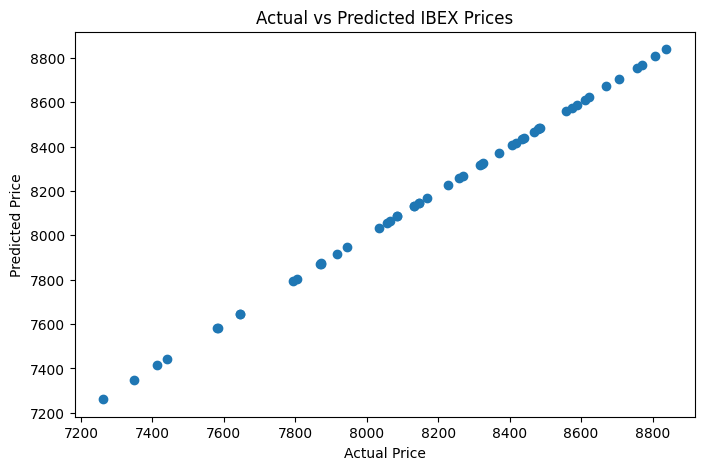

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted IBEX Prices")
plt.show()


# 7. Conclusion & Future Scope
The model successfully predicts market trends using machine learning.  
Future improvements include deep learning models, technical indicators, and sentiment analysis.
